In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d   
import numpy as np
import sys
import pandas as pd
from numpy import exp, loadtxt, pi, sqrt
from mpl_toolkits import mplot3d
import seaborn as sns
np.set_printoptions(threshold=sys.maxsize)
import math
# To solve for cross-section limit
from scipy.optimize import brentq


In [2]:
CosSunTotalMomentumReco = np.loadtxt('CosSunTotalMomentumReco.dat')
EnergyTrue = np.loadtxt('EnergyTrue.dat')
PdgReco = np.loadtxt('PdgReco.dat', dtype=str)
PrimaryVtxXTrue = np.loadtxt('PrimaryVtxXTrue.dat')
PrimaryVtxZReco = np.loadtxt('PrimaryVtxZReco.dat')
PtTotalMomentumTrue = np.loadtxt('PtTotalMomentumTrue.dat')
CosSunTotalMomentumTrue = np.loadtxt('CosSunTotalMomentumTrue.dat')
MomentumReco = np.loadtxt('MomentumReco.dat')
PdgTrue = np.loadtxt('PdgTrue.dat')
PrimaryVtxYReco = np.loadtxt('PrimaryVtxYReco.dat')
PrimaryVtxZTrue = np.loadtxt('PrimaryVtxZTrue.dat')
TotalMomentumReco = np.loadtxt('TotalMomentumReco.dat')
EnergyReco = np.loadtxt('EnergyReco.dat')
MomentumTrue = np.loadtxt('MomentumTrue.dat')
PrimaryVtxXReco = np.loadtxt('PrimaryVtxXReco.dat')
PrimaryVtxYTrue = np.loadtxt('PrimaryVtxYTrue.dat')
PtTotalMomentumReco = np.loadtxt('PtTotalMomentumReco.dat')
TotalMomentumTrue = np.loadtxt('TotalMomentumTrue.dat')
RecoTrueAngleDiff = np.loadtxt('RecoTrueAngleDiff.dat')
CosSunRecoAndTrue = np.loadtxt('CosSunRecoAndTrue.dat')

BoostOfTrueTrack = np.loadtxt('fileTrue.dat', dtype=str)
BoostOfTrueEvent = np.loadtxt('fileinevTrue.dat', dtype = str)

BoostOfRecoTrack = np.loadtxt('fileReco.dat', dtype=str)
BoostOfRecoEvent = np.loadtxt('fileinevReco.dat', dtype = str)
CosSunTotalMomentumRecoBG = np.loadtxt('CosSunTotalMomentumRecoBG.dat')

In [3]:
firstFile = BoostOfTrueTrack[0]
b1p1=True
b1p5=True
numTrackTrueb1p1=0
numTrackTrueb1p5=0
numTrackTrueb10=0
i=0
for fileSample in BoostOfTrueTrack:
    if (fileSample != firstFile and b1p1):
        numTrackTrueb1p1 = i
        firstFile = fileSample
        b1p1 = False
    if (fileSample != firstFile and b1p5):
        numTrackTrueb1p5 = i
        firstFile = fileSample
        b1p5 = False
    numTrackTrueb10 = BoostOfTrueTrack.size
    i=i+1
    #print(firstFile,fileSample)
    
print(numTrackTrueb1p1)
print(numTrackTrueb1p5)
print(numTrackTrueb10)
       
    
    
    

29204
86964
212262


In [4]:
firstFile = BoostOfTrueTrack[0]
b1p1=True
b1p5=True
numEventTrueb1p1=0
numEventTrueb1p5=0
numEventTrueb10=0
i=0
for fileSample in BoostOfTrueEvent:
    if (fileSample != firstFile and b1p1):
        numEventTrueb1p1 = i
        firstFile = fileSample
        b1p1 = False
    if (fileSample != firstFile and b1p5):
        numEventTrueb1p5 = i
        firstFile = fileSample
        b1p5 = False
    numEventTrueb10 = BoostOfTrueEvent.size
    i=i+1
    #print(firstFile,fileSample)
    
print(numEventTrueb1p1)
print(numEventTrueb1p5)
print(numEventTrueb10)
       
    

9523
21565
27785


In [5]:
firstFile = BoostOfTrueTrack[0]
b1p1=True
b1p5=True
numTrackRecob1p1=0
numTrackRecob1p5=0
numTrackRecob10=0
i=0
for fileSample in BoostOfRecoTrack:
    if (fileSample != firstFile and b1p1):
        numTrackRecob1p1 = i
        firstFile = fileSample
        b1p1 = False
    if (fileSample != firstFile and b1p5):
        numTrackRecob1p5 = i
        firstFile = fileSample
        b1p5 = False
    numTrackRecob10 = BoostOfRecoTrack.size
    i=i+1
    #print(firstFile,fileSample)
    
print(numTrackRecob1p1)
print(numTrackRecob1p5)
print(numTrackRecob10)

825
12211
28817


In [6]:
firstFile = BoostOfTrueTrack[0]
b1p1=True
b1p5=True
numEventRecob1p1=0
numEventRecob1p5=0
numEventRecob10=0
i=0
for fileSample in BoostOfRecoEvent:
    if (fileSample != firstFile and b1p1):
        numEventRecob1p1 = i
        firstFile = fileSample
        b1p1 = False
    if (fileSample != firstFile and b1p5):
        numEventRecob1p5 = i
        firstFile = fileSample
        b1p5 = False
    numEventRecob10 = BoostOfRecoEvent.size
    i=i+1
    #print(firstFile,fileSample)
    
print(numEventRecob1p1)
print(numEventRecob1p5)
print(numEventRecob10)
       
    

801
8030
12875


<IPython.core.display.Javascript object>


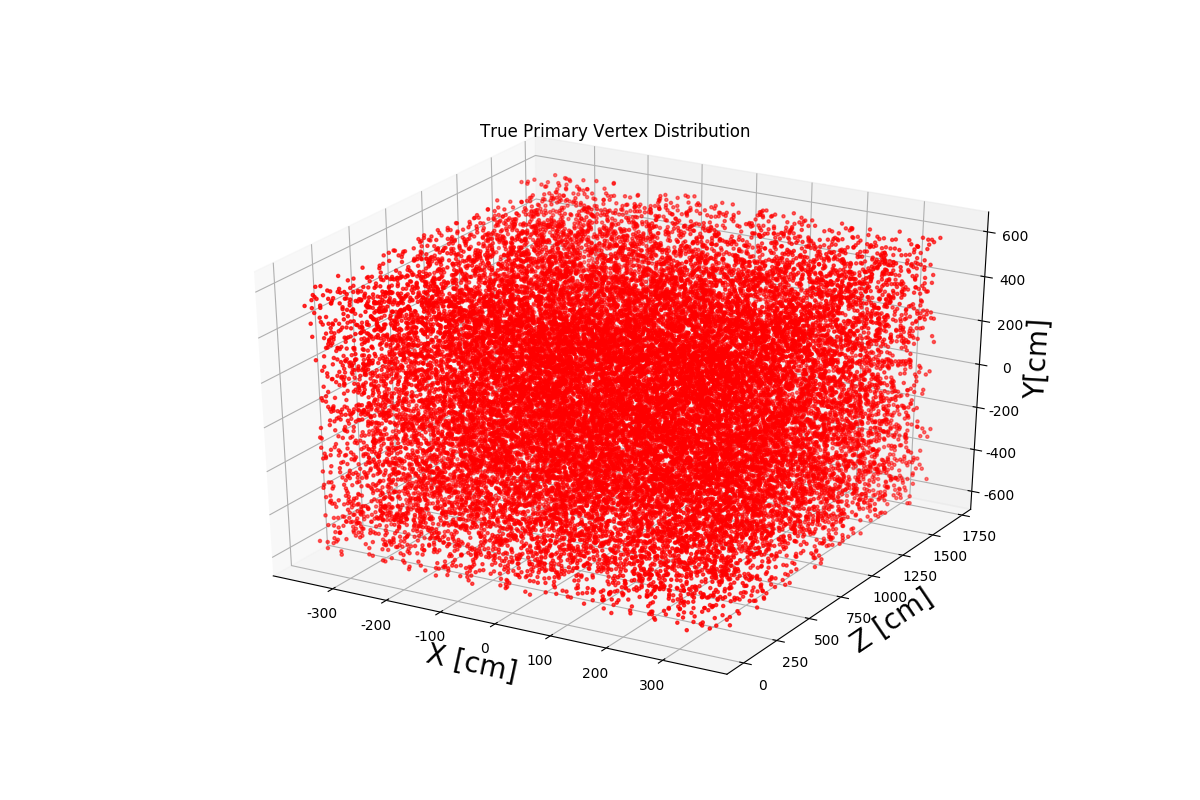

<IPython.core.display.Javascript object>


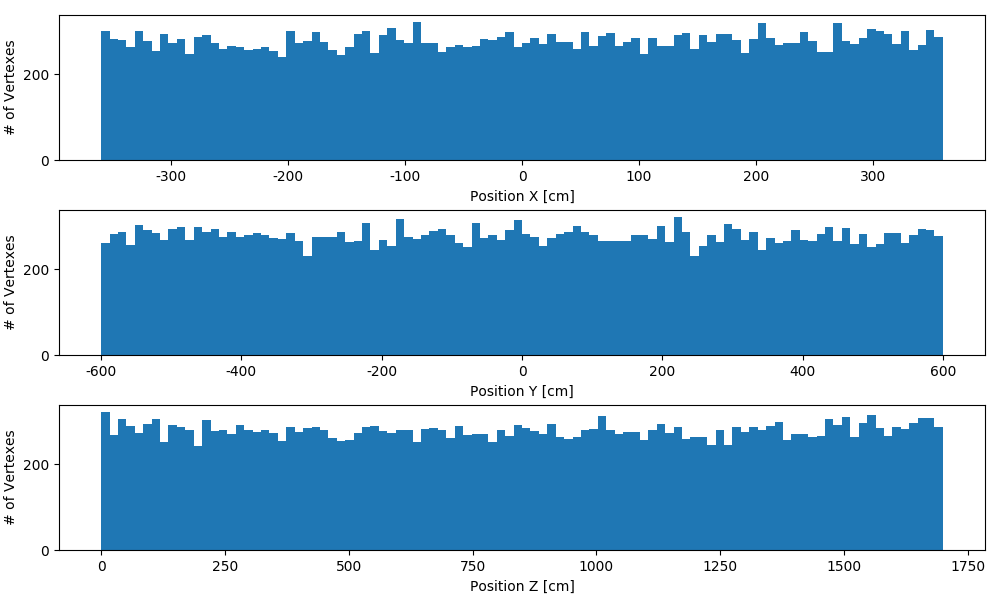

In [7]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter3D(PrimaryVtxXTrue, PrimaryVtxZTrue, PrimaryVtxYTrue, c='r', marker = '.')

ax.set_xlabel('X [cm]', fontsize=20)
ax.set_ylabel('Z [cm]', fontsize=20)
ax.set_zlabel('Y[cm]', fontsize=20)
ax.set_title('True Primary Vertex Distribution')

plt.savefig('TrueVtx3d.pdf')

fig, ax = plt.subplots(3, figsize=(10, 6))

ax[0].hist(PrimaryVtxXTrue, bins = 100)
ax[0].set_xlabel("Position X [cm]")
ax[0].set_ylabel("# of Vertexes")

ax[1].hist(PrimaryVtxYTrue, bins = 100)
ax[1].set_xlabel("Position Y [cm]")
ax[1].set_ylabel("# of Vertexes")

ax[2].hist(PrimaryVtxZTrue, bins = 100)
ax[2].set_xlabel("Position Z [cm]")
ax[2].set_ylabel("# of Vertexes")

plt.savefig('TrueVtxhists.pdf')

fig.tight_layout()


In [8]:
(unique, counts) = np.unique(PdgTrue[0:numTrackTrueb1p1], return_counts=True)

freq_true_b1p1 = np.asarray((unique, counts)).T
data = {'PDG Code': freq_true_b1p1[:,0], '#Particles':freq_true_b1p1[:,1]}
df_true_b1p1 = pd.DataFrame(data=data,dtype=np.int)
df_true_b1p1

,PDG Code,#Particles
0,2212,29204


In [9]:
(unique, counts) = np.unique(PdgTrue[numTrackTrueb1p1:numTrackTrueb1p5], return_counts=True)

freq_true_b1p5 = np.asarray((unique, counts)).T
data = {'PDG Code': freq_true_b1p5[:,0], '#Particles':freq_true_b1p5[:,1]}
df_true_b1p5 = pd.DataFrame(data=data,dtype=np.int)
df_true_b1p5

,PDG Code,#Particles
0,211,1958
1,2212,55802


In [10]:
(unique, counts) = np.unique(PdgTrue[numTrackTrueb1p5:numTrackTrueb10], return_counts=True)

freq_true_b10 = np.asarray((unique, counts)).T
data = {'PDG Code': freq_true_b10[:,0], '#Particles':freq_true_b10[:,1]}
df_true_b10 = pd.DataFrame(data=data,dtype=np.int)
df_true_b10

,PDG Code,#Particles
0,130,286
1,211,8090
2,310,275
3,311,241
4,321,443
5,331,15
6,2212,115422
7,3112,70
8,3122,367
9,3212,40


<IPython.core.display.Javascript object>


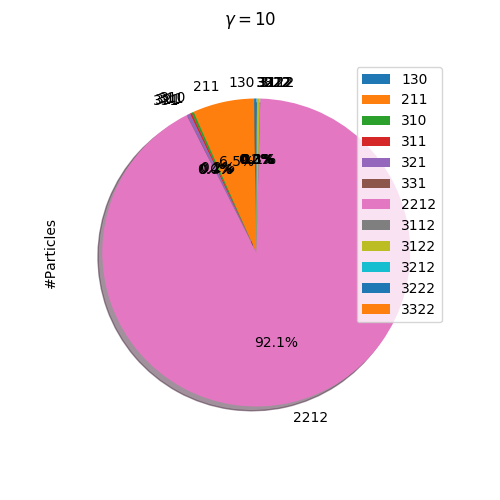

<IPython.core.display.Javascript object>


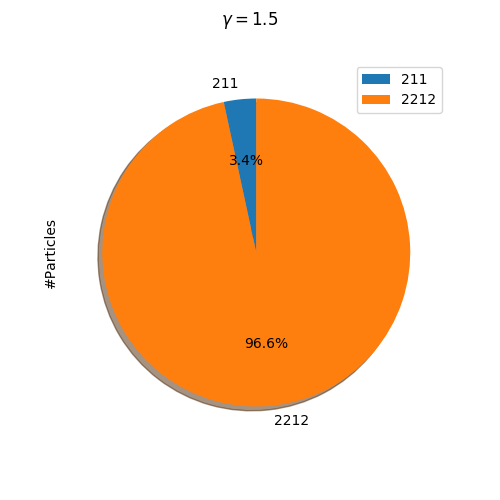

<IPython.core.display.Javascript object>


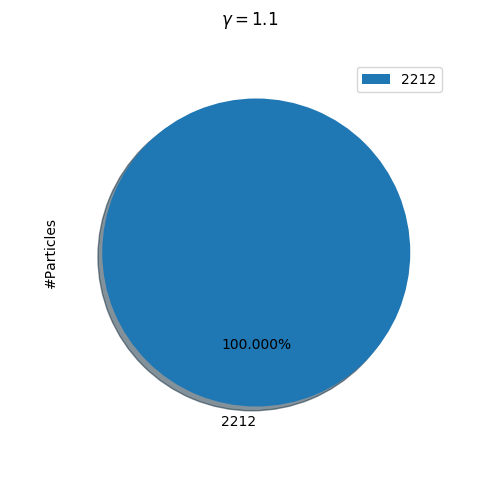

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0197608c50>],
      dtype=object)

In [11]:
df_true_b10.groupby(['PDG Code']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(5,5), autopct='%1.1f%%', title = '$\gamma = 10$' )
df_true_b1p5.groupby(['PDG Code']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(5,5), autopct='%1.1f%%', title = '$\gamma = 1.5$' )
df_true_b1p1.groupby(['PDG Code']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(5,5), autopct='%1.3f%%',  title = '$\gamma = 1.1$')

<IPython.core.display.Javascript object>


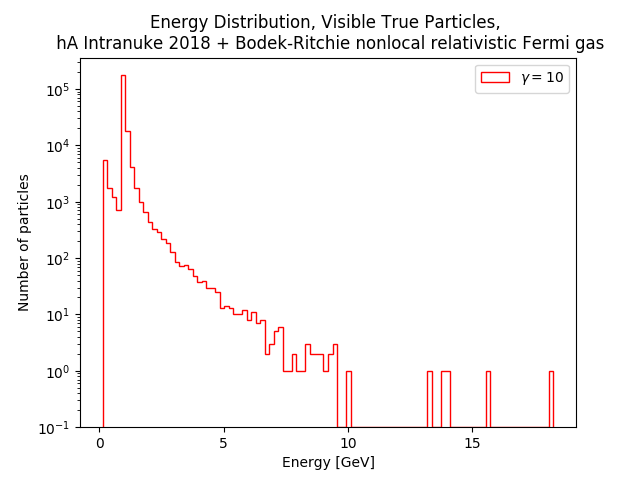

In [12]:
plt.figure(dpi=100)
plt.hist(EnergyTrue[0:numTrackTrueb10], bins = 100,log = True, color = "red", histtype='step', lw=1,label='$\gamma = 10$')
plt.title('Energy Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend()
plt.xlabel('Energy [GeV]') 
plt.ylabel('Number of particles')
plt.savefig('EnergyDistTrueb10.pdf')

<IPython.core.display.Javascript object>


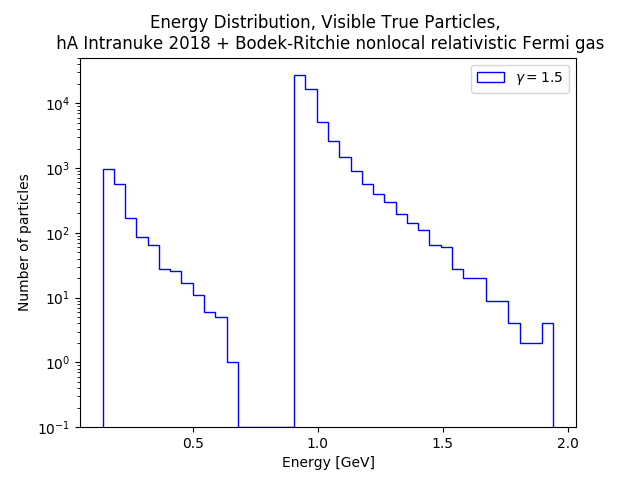

In [13]:
plt.figure(dpi=100)
plt.hist(EnergyTrue[numTrackTrueb1p1:numTrackTrueb1p5], bins = 40,log = True, color = "blue", histtype='step', lw=1,label='$\gamma = 1.5$')
plt.title('Energy Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend()
plt.xlabel('Energy [GeV]') 
plt.ylabel('Number of particles')

plt.savefig('EnergyDistTrueb1p5.pdf')

<IPython.core.display.Javascript object>


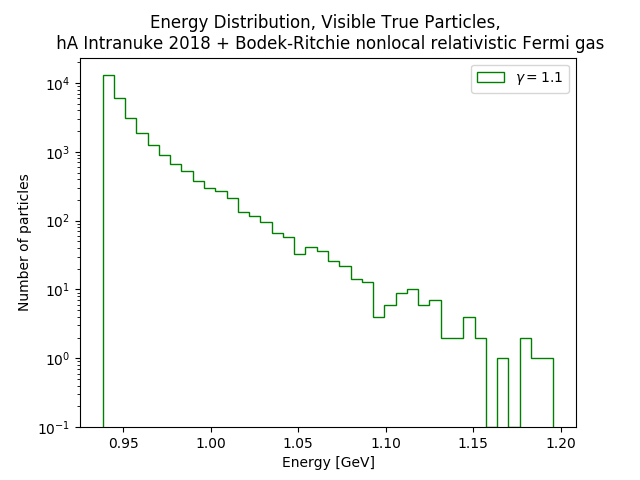

In [14]:
plt.figure(dpi=100)
plt.hist(EnergyTrue[0:numTrackTrueb1p1], bins = 40,log = True, color = "green", histtype='step', lw=1,label='$\gamma =1.1$')
plt.title('Energy Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend()
plt.xlabel('Energy [GeV]') 
plt.ylabel('Number of particles')
plt.savefig('EnergyDistTrueb1p1.pdf')

<IPython.core.display.Javascript object>


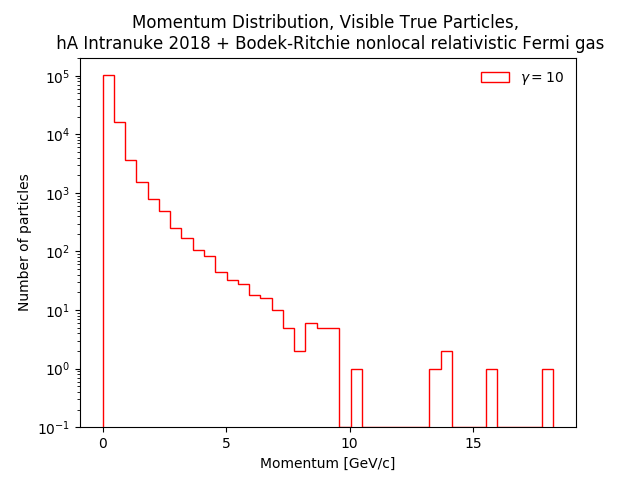

In [15]:
plt.figure(dpi=100)
plt.hist(MomentumTrue[numTrackTrueb1p5:numTrackTrueb10], bins = 40,log = True, color = "red", histtype='step', lw=1,label='$\gamma = 10$')
plt.title('Momentum Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Momentum [GeV/c]') 
plt.ylabel('Number of particles') 
plt.savefig('MomentumDistTrueb10.pdf')

<IPython.core.display.Javascript object>


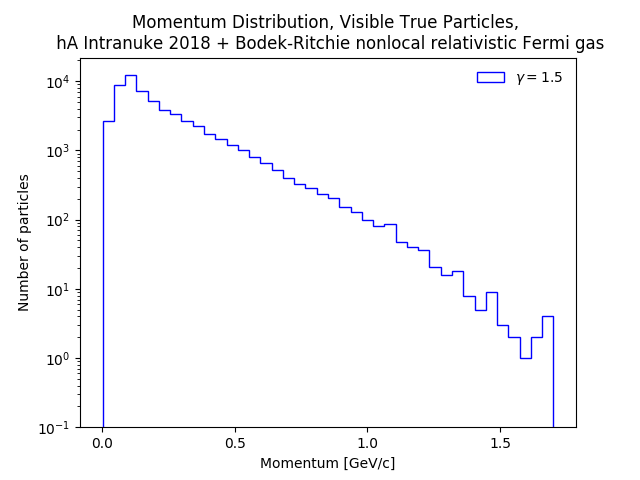

In [16]:
plt.figure(dpi=100)
plt.hist(MomentumTrue[numTrackTrueb1p1:numTrackTrueb1p5], bins = 40,log = True, color = "blue", histtype='step', lw=1,label='$\gamma = 1.5$')
plt.title('Momentum Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Momentum [GeV/c]') 
plt.ylabel('Number of particles') 
plt.savefig('MomentumDistTrueb1p5.pdf')

<IPython.core.display.Javascript object>


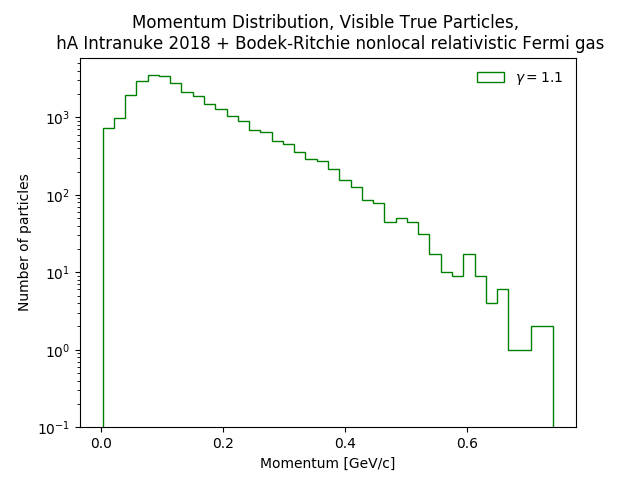

In [17]:
plt.figure(dpi=100)
plt.hist(MomentumTrue[0:numTrackTrueb1p1], bins = 40,log = True, color = "green", histtype='step', lw=1,label='$\gamma =1.1$')
plt.title('Momentum Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Momentum [GeV/c]') 
plt.ylabel('Number of particles') 
plt.savefig('MomentumDistTrueb1p1.pdf')

<IPython.core.display.Javascript object>


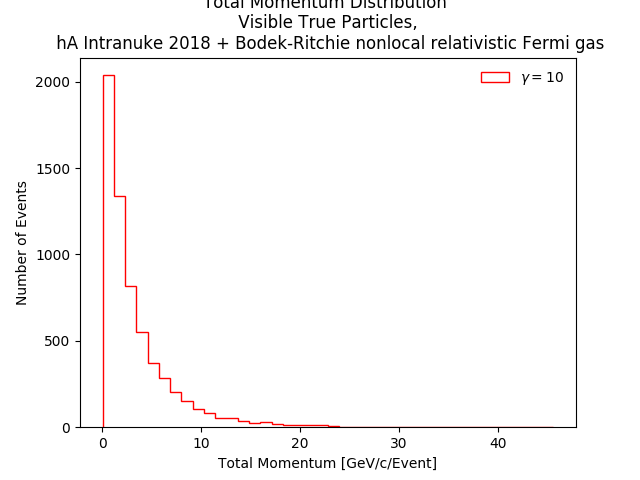

In [18]:
plt.figure(dpi=100)
plt.hist(TotalMomentumTrue[numEventTrueb1p5:numEventTrueb10], bins = 40, color = "red", histtype='step', lw=1,label='$\gamma = 10$')
plt.title('Total Momentum Distribution \n Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Total Momentum [GeV/c/Event]') 
plt.ylabel('Number of Events')
plt.savefig('TotalMomentumTrueDistb10.pdf')

<IPython.core.display.Javascript object>


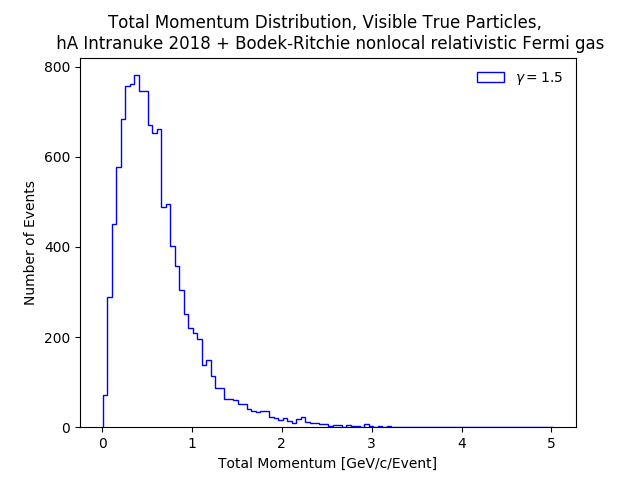

In [19]:
plt.figure(dpi=100)
plt.hist(TotalMomentumTrue[numEventTrueb1p1:numEventTrueb1p5], bins = 100, color = "blue", histtype='step', lw=1,label='$\gamma = 1.5$')
plt.title('Total Momentum Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Total Momentum [GeV/c/Event]') 
plt.ylabel('Number of Events') 
plt.savefig('TotalMomentumTrueDistb1p5.pdf')

#print(TotalMomentumTrue[9966:19645])


<IPython.core.display.Javascript object>


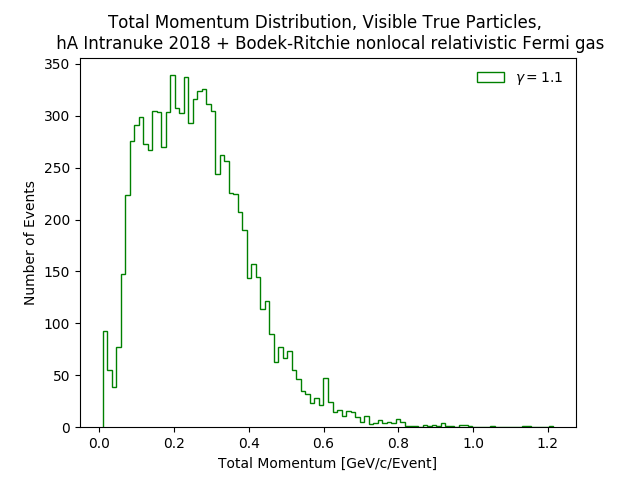

In [20]:
plt.figure(dpi=100)
plt.hist(TotalMomentumTrue[0:numEventTrueb1p1], bins = 100, color = "green", histtype='step', lw=1,label='$\gamma =1.1$')
plt.title('Total Momentum Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Total Momentum [GeV/c/Event]') 
plt.ylabel('Number of Events') 
plt.savefig('TotalMomentumTrueDistb1p1.pdf')

<IPython.core.display.Javascript object>


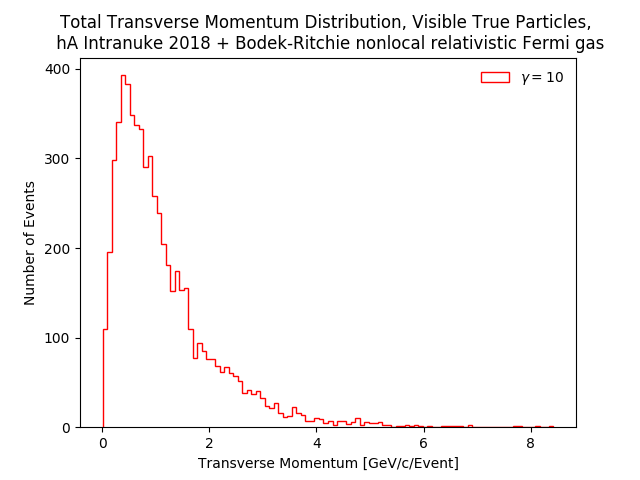

In [21]:
plt.figure(dpi=100)
plt.hist(PtTotalMomentumTrue[numEventTrueb1p5:numEventTrueb10], bins = 100, color = "red", histtype='step', lw=1,label='$\gamma = 10$')
plt.title('Total Transverse Momentum Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Transverse Momentum [GeV/c/Event]') 
plt.ylabel('Number of Events') 
plt.savefig('TotalTransverseMomentumTrueDistb10.pdf')

<IPython.core.display.Javascript object>


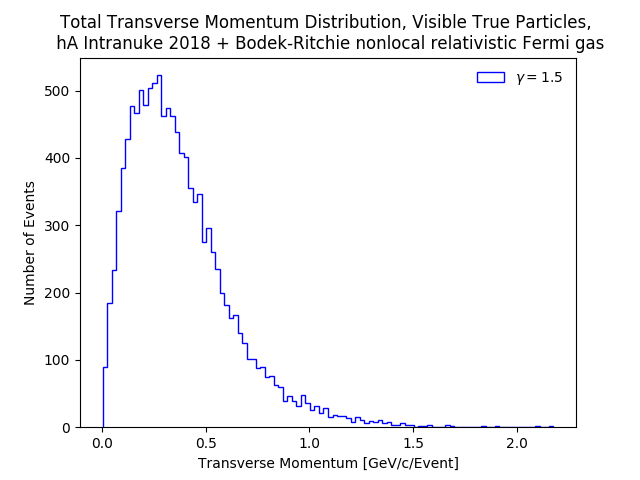

In [22]:
plt.figure(dpi=100)
plt.hist(PtTotalMomentumTrue[numEventTrueb1p1:numEventTrueb1p5], bins = 100, color = "blue", histtype='step', lw=1,label='$\gamma = 1.5$')
plt.title('Total Transverse Momentum Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Transverse Momentum [GeV/c/Event]') 
plt.ylabel('Number of Events') 
plt.savefig('TotalTransverseMomentumTrueDistb1p5.pdf')

<IPython.core.display.Javascript object>


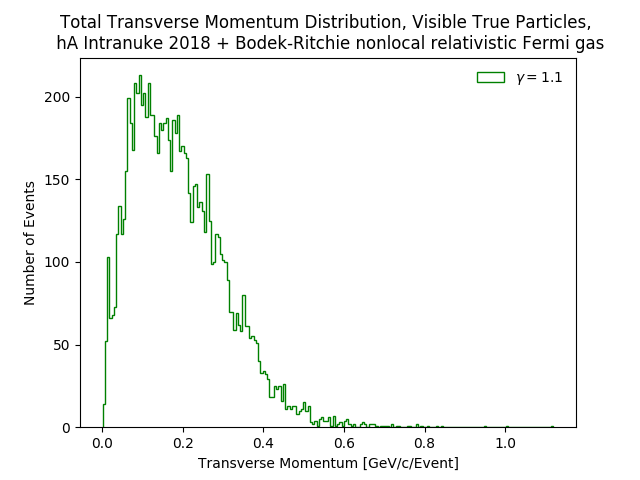

In [23]:
plt.figure(dpi=100)
plt.hist(PtTotalMomentumTrue[0:numEventTrueb1p1], bins = 200, color = "green", histtype='step', lw=1,label='$\gamma =1.1$')
plt.title('Total Transverse Momentum Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Transverse Momentum [GeV/c/Event]') 
plt.ylabel('Number of Events') 
plt.savefig('TotalTransverseMomentumTrueDistb1p1.pdf')

<IPython.core.display.Javascript object>


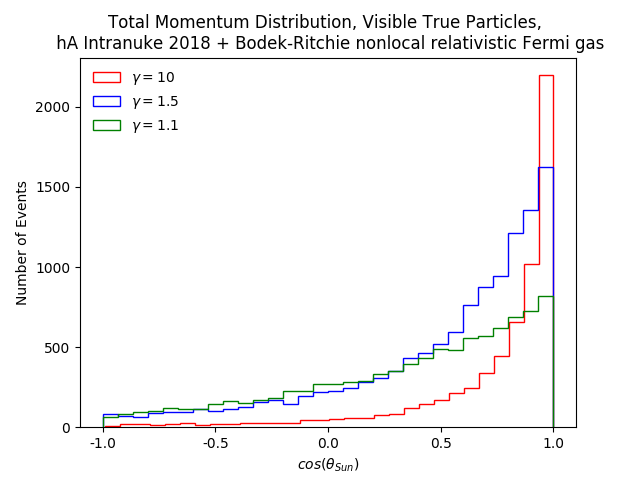

In [24]:
plt.figure(dpi=100)
plt.hist(CosSunTotalMomentumTrue[numEventTrueb1p5:numEventTrueb10], bins = 30, color = "red", histtype='step', lw=1,label='$\gamma = 10$')
plt.hist(CosSunTotalMomentumTrue[numEventTrueb1p1:numEventTrueb1p5], bins = 30, color = "blue", histtype='step', lw=1,label='$\gamma = 1.5$')
plt.hist(CosSunTotalMomentumTrue[0:numEventTrueb1p1], bins = 30, color = "green", histtype='step', lw=1,label='$\gamma =1.1$')
plt.title('Total Momentum Distribution, Visible True Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper left', frameon=False)
plt.xlabel(r'$cos(\theta_{Sun})$') 
plt.ylabel('Number of Events') 
plt.savefig('CosSunTrueDistBDM.pdf')

# Reco Information

<IPython.core.display.Javascript object>


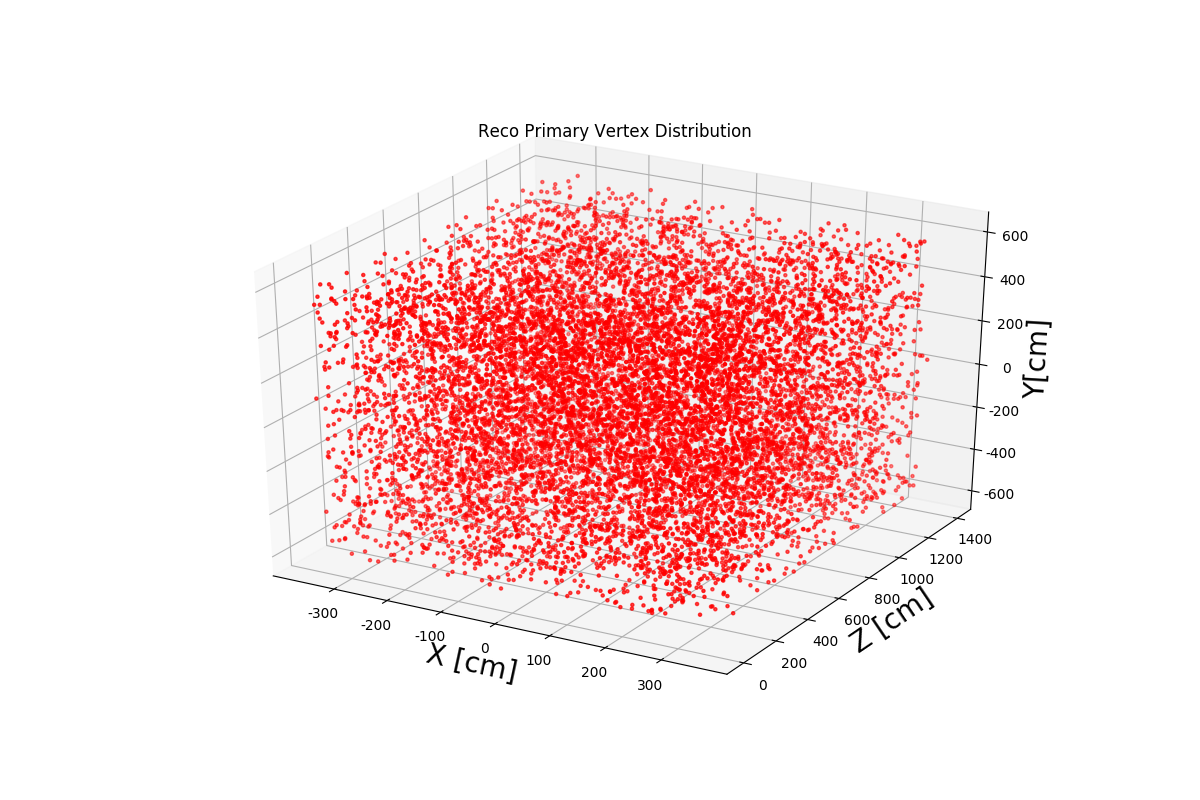

<IPython.core.display.Javascript object>


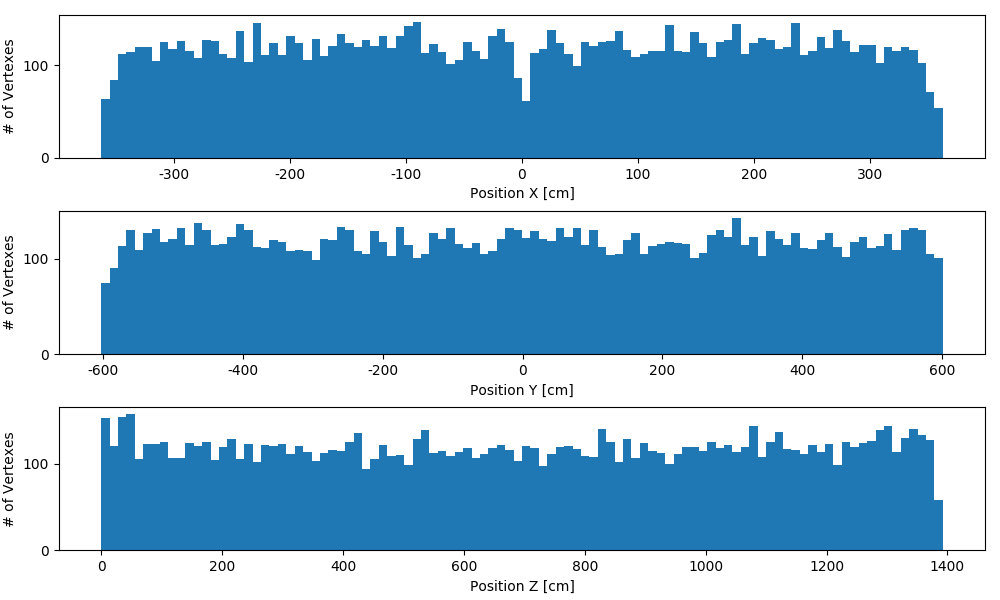

In [25]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
ax.scatter3D(PrimaryVtxXReco[PrimaryVtxXReco!=0], PrimaryVtxZReco[PrimaryVtxZReco!=0], PrimaryVtxYReco[PrimaryVtxYReco!=0], c='r', marker = '.')

ax.set_xlabel('X [cm]', fontsize=20)
ax.set_ylabel('Z [cm]', fontsize=20)
ax.set_zlabel('Y[cm]', fontsize=20)
ax.set_title('Reco Primary Vertex Distribution')

plt.savefig('RecoVtx3dSignal.pdf')

fig, ax = plt.subplots(3, figsize=(10, 6))

ax[0].hist(PrimaryVtxXReco[PrimaryVtxYReco!=0], bins = 100)
ax[0].set_xlabel("Position X [cm]")
ax[0].set_ylabel("# of Vertexes")

ax[1].hist(PrimaryVtxYReco[PrimaryVtxYReco!=0], bins = 100)
ax[1].set_xlabel("Position Y [cm]")
ax[1].set_ylabel("# of Vertexes")

ax[2].hist(PrimaryVtxZReco[PrimaryVtxZReco!=0], bins = 100)
ax[2].set_xlabel("Position Z [cm]")
ax[2].set_ylabel("# of Vertexes")

plt.savefig('RecoVtxhistsSignal.pdf')

fig.tight_layout()


In [26]:
(unique, counts) = np.unique(PdgReco[numTrackRecob1p5:numTrackRecob10], return_counts=True)

freq_reco_b10 = np.asarray((unique, counts)).T
data = {'PDG Code': freq_reco_b10[:,0], '#Particles':freq_reco_b10[:,1]}
df_reco_b10 = pd.DataFrame(data=data,dtype=np.int)
df_reco_b10

/home/leoperes/.local/lib/python3.6/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


,PDG Code,#Particles
0,Muon,14795
1,Proton,1811


In [27]:
(unique, counts) = np.unique(PdgReco[numTrackRecob1p1:numTrackRecob1p5], return_counts=True)

freq_reco_b1p5 = np.asarray((unique, counts)).T
data = {'PDG Code': freq_reco_b1p5[:,0], '#Particles':freq_reco_b1p5[:,1]}
df_reco_b1p5 = pd.DataFrame(data=data,dtype=np.int)
df_reco_b1p5

/home/leoperes/.local/lib/python3.6/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


,PDG Code,#Particles
0,Muon,9130
1,Proton,2256


In [28]:
(unique, counts) = np.unique(PdgReco[0:numTrackRecob1p1], return_counts=True)

freq_reco_b1p1 = np.asarray((unique, counts)).T
data = {'PDG Code': freq_reco_b1p1[:,0], '#Particles':freq_reco_b1p1[:,1]}
df_reco_b1p1 = pd.DataFrame(data=data,dtype=np.int)
df_reco_b1p1

/home/leoperes/.local/lib/python3.6/site-packages/numpy/core/numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


,PDG Code,#Particles
0,Muon,649
1,Proton,176


/home/leoperes/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:184: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


<IPython.core.display.Javascript object>


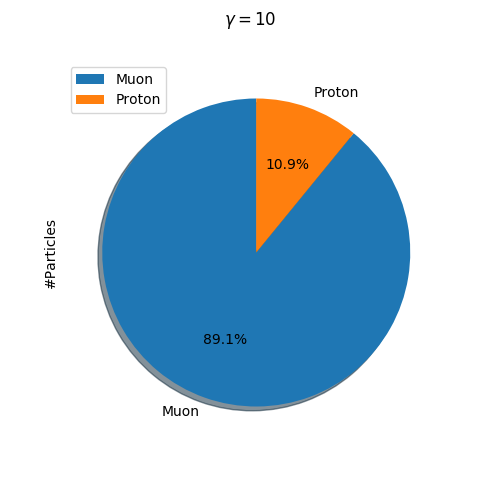

<IPython.core.display.Javascript object>


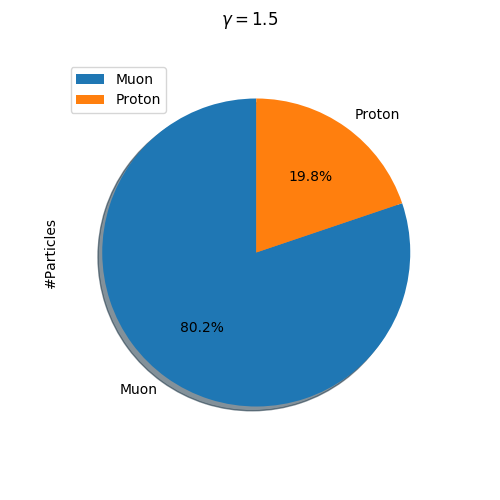

<IPython.core.display.Javascript object>


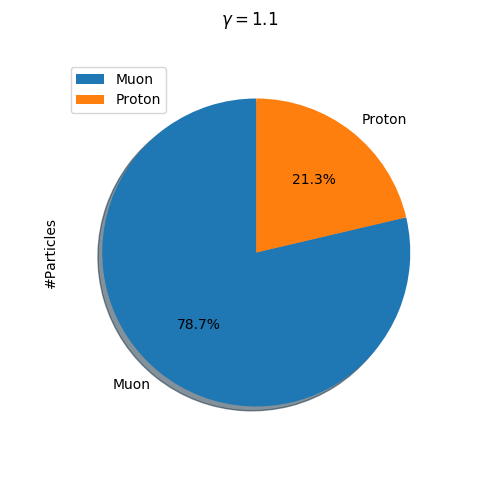

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f01875bc5c0>],
      dtype=object)

In [29]:
df_reco_b10.groupby(['PDG Code']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(5,5), autopct='%1.1f%%', title = '$\gamma = 10$')
df_reco_b1p5.groupby(['PDG Code']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(5,5), autopct='%1.1f%%', title = '$\gamma = 1.5$')
df_reco_b1p1.groupby(['PDG Code']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(5,5), autopct='%1.1f%%', title ='$\gamma = 1.1$')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


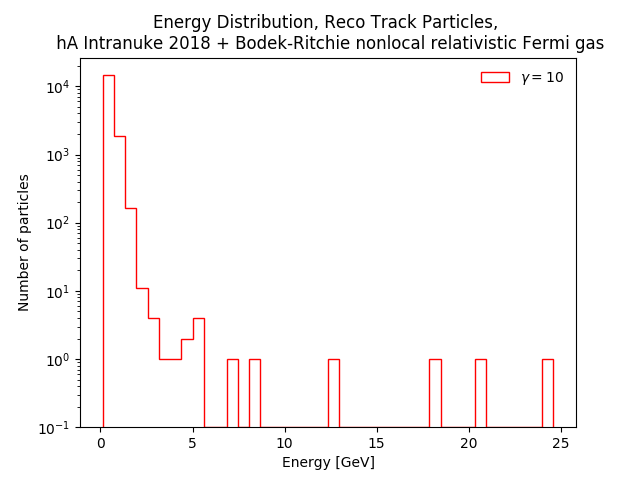

In [30]:
plt.figure(dpi=100)
plt.hist(EnergyReco[numTrackRecob1p5:numTrackRecob10], bins = 40, log = True, color = "red", histtype='step', lw=1,label='$\gamma = 10$')
plt.title('Energy Distribution, Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Energy [GeV]') 
plt.ylabel('Number of particles') 
plt.savefig('EnergyRecoDistb10.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


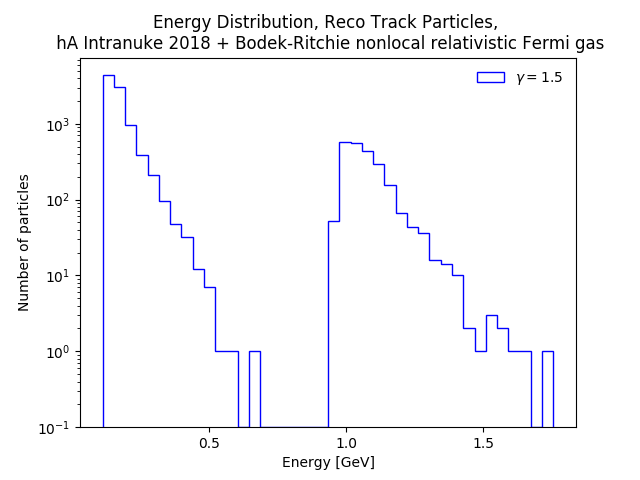

In [31]:
plt.figure(dpi=100)
plt.hist(EnergyReco[numTrackRecob1p1:numTrackRecob1p5], bins = 40, log = True, color = "blue", histtype='step', lw=1,label='$\gamma = 1.5$')
plt.title('Energy Distribution, Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Energy [GeV]') 
plt.ylabel('Number of particles') 
plt.savefig('EnergyRecoDistb1p5.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


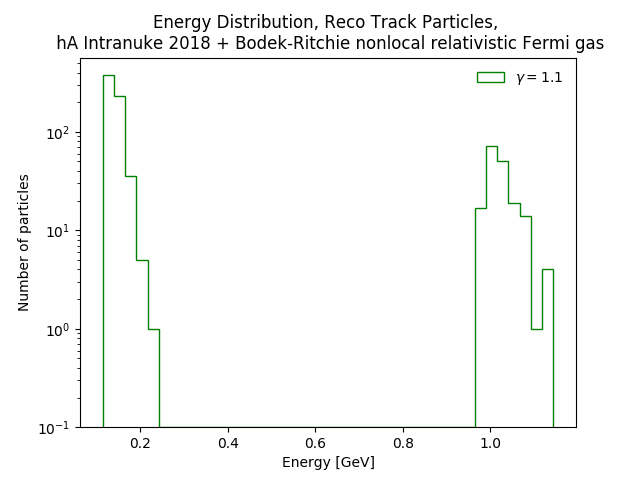

In [32]:
plt.figure(dpi=100)
plt.hist(EnergyReco[0:numTrackRecob1p1], bins = 40, log = True, color = "green", histtype='step', lw=1,label='$\gamma =1.1$')
plt.title('Energy Distribution, Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Energy [GeV]') 
plt.ylabel('Number of particles') 
plt.savefig('EnergyRecoDistb1p1.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


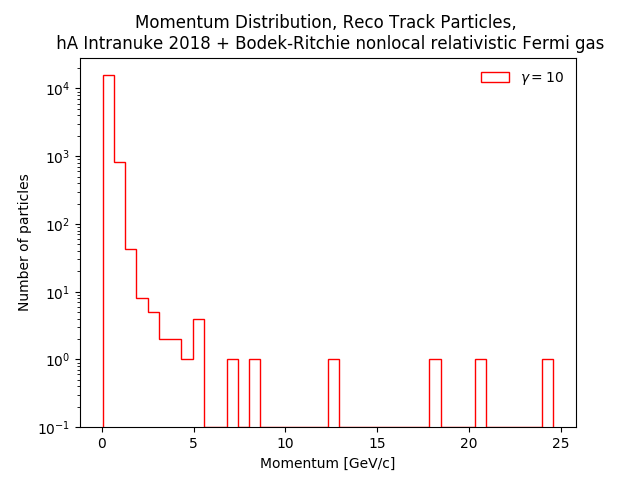

In [33]:
plt.figure(dpi=100)
plt.hist(MomentumReco[numTrackRecob1p5:numTrackRecob10], bins = 40, log = True, color = "red", histtype='step', lw=1,label='$\gamma = 10$')
plt.title('Momentum Distribution, Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Momentum [GeV/c]') 
plt.ylabel('Number of particles') 
plt.savefig('MomentumRecoDistb10.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


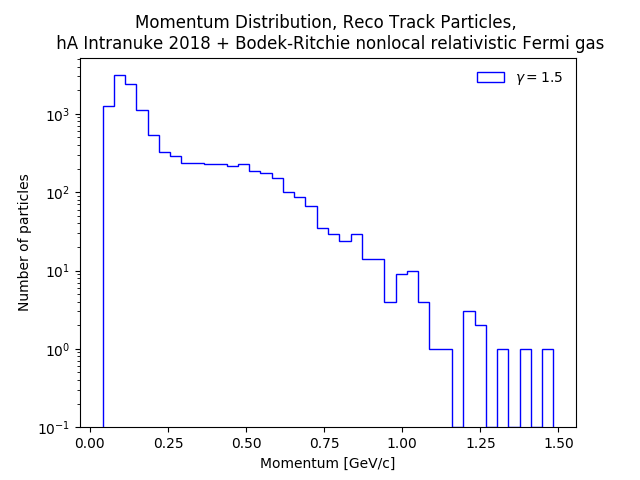

In [34]:
plt.figure(dpi=100)
plt.hist(MomentumReco[numTrackRecob1p1:numTrackRecob1p5], bins = 40, log = True, color = "blue", histtype='step', lw=1,label='$\gamma = 1.5$')
plt.title('Momentum Distribution, Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Momentum [GeV/c]') 
plt.ylabel('Number of particles') 
plt.savefig('MomentumRecoDistb1p5.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


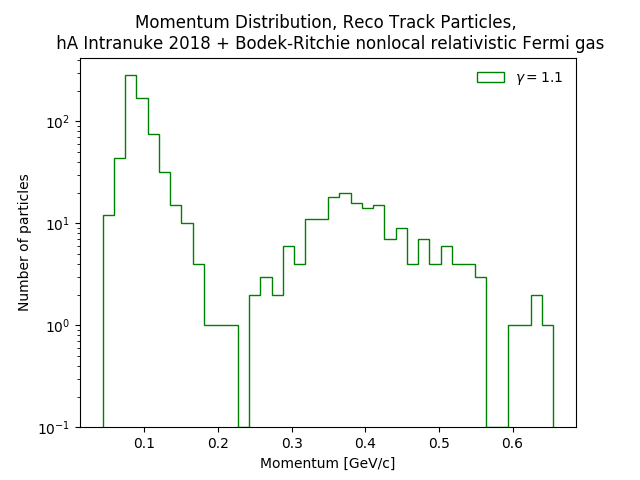

In [35]:
plt.figure(dpi=100)
plt.hist(MomentumReco[0:numTrackRecob1p1], bins = 40, log = True, color = "green", histtype='step', lw=1,label='$\gamma =1.1$')
plt.title('Momentum Distribution, Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Momentum [GeV/c]') 
plt.ylabel('Number of particles') 
plt.savefig('MomentumRecoDistb1p1.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


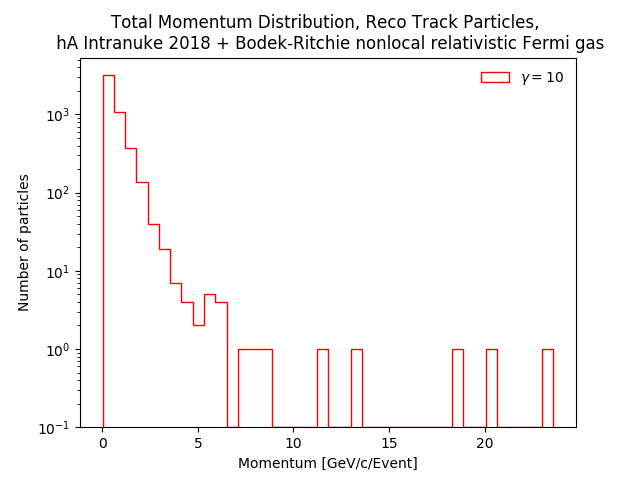

In [36]:
plt.figure(dpi=100)
plt.hist(TotalMomentumReco[numEventRecob1p5:numEventRecob10], bins = 40, log = True, color = "red", histtype='step', lw=1,label='$\gamma = 10$')
plt.title('Total Momentum Distribution, Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Momentum [GeV/c/Event]') 
plt.ylabel('Number of particles') 
plt.savefig('TotalMomentumRecoDistb10.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


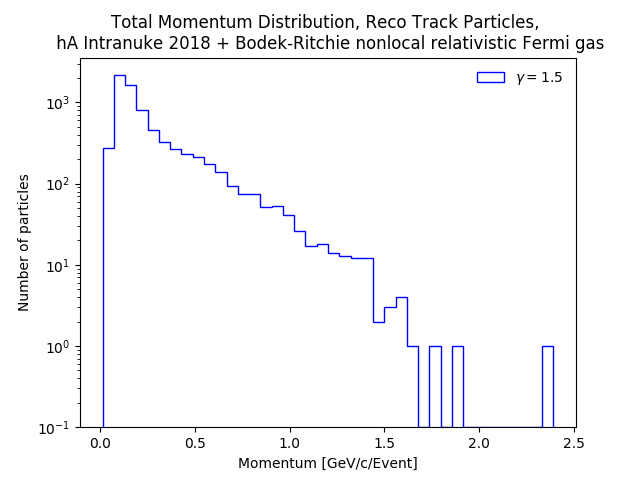

In [37]:
plt.figure(dpi=100)
plt.hist(TotalMomentumReco[numEventRecob1p1:numEventRecob1p5], bins = 40, log = True, color = "blue", histtype='step', lw=1,label='$\gamma = 1.5$')
plt.title('Total Momentum Distribution, Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Momentum [GeV/c/Event]') 
plt.ylabel('Number of particles') 
plt.savefig('TotalMomentumRecoDistb1p5.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


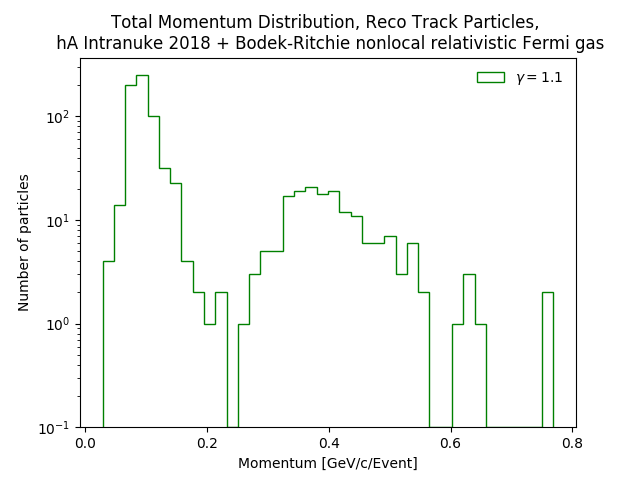

In [38]:
plt.figure(dpi=100)
plt.hist(TotalMomentumReco[0:numEventRecob1p1], bins = 40, log = True, color = "green", histtype='step', lw=1,label='$\gamma =1.1$')
plt.title('Total Momentum Distribution, Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Momentum [GeV/c/Event]') 
plt.ylabel('Number of particles')
plt.savefig('TotalMomentumRecoDistb1p1.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


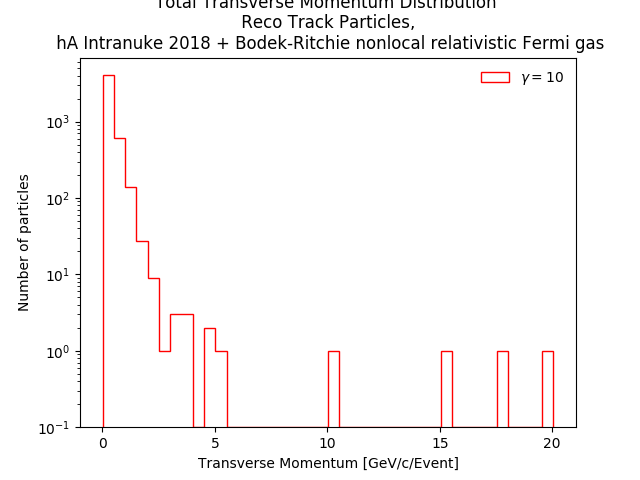

In [39]:
plt.figure(dpi=100)
plt.hist(PtTotalMomentumReco[numEventRecob1p5:numEventRecob10], bins = 40, log = True, color = "red", histtype='step', lw=1,label='$\gamma = 10$')
plt.title('Total Transverse Momentum Distribution \n Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Transverse Momentum [GeV/c/Event]') 
plt.ylabel('Number of particles') 
plt.savefig('TransverseTotalMomentumRecoTrueb10.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


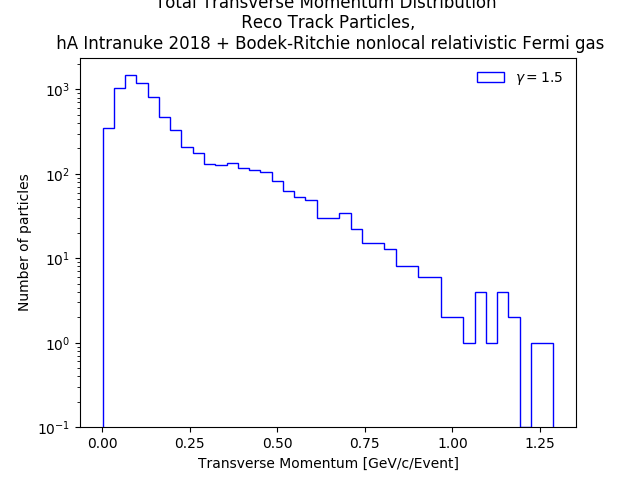

In [40]:
plt.figure(dpi=100)
plt.hist(PtTotalMomentumReco[numEventRecob1p1:numEventRecob1p5], bins = 40, log = True, color = "blue", histtype='step', lw=1,label='$\gamma = 1.5$')
plt.title('Total Transverse Momentum Distribution \n Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Transverse Momentum [GeV/c/Event]') 
plt.ylabel('Number of particles') 
plt.savefig('TransverseTotalMomentumRecoTrueb1p5.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


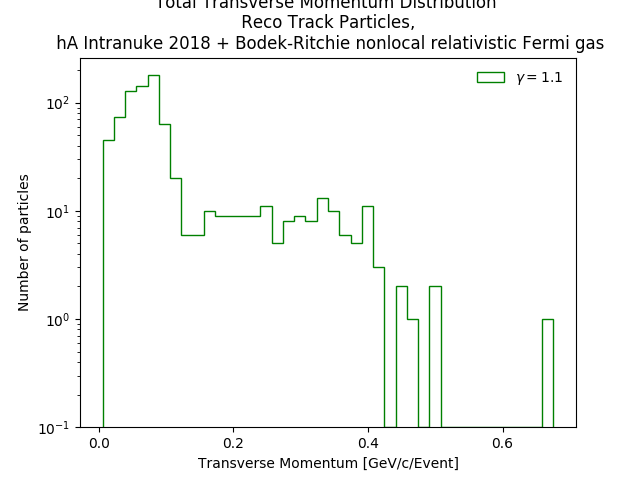

In [41]:
plt.figure(dpi=100)
plt.hist(PtTotalMomentumReco[0:numEventRecob1p1], bins = 40, log = True, color = "green", histtype='step', lw=1,label='$\gamma =1.1$')
plt.title('Total Transverse Momentum Distribution \n Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel('Transverse Momentum [GeV/c/Event]') 
plt.ylabel('Number of particles') 
plt.savefig('TransverseTotalMomentumRecoTrueb1p1.pdf')

/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


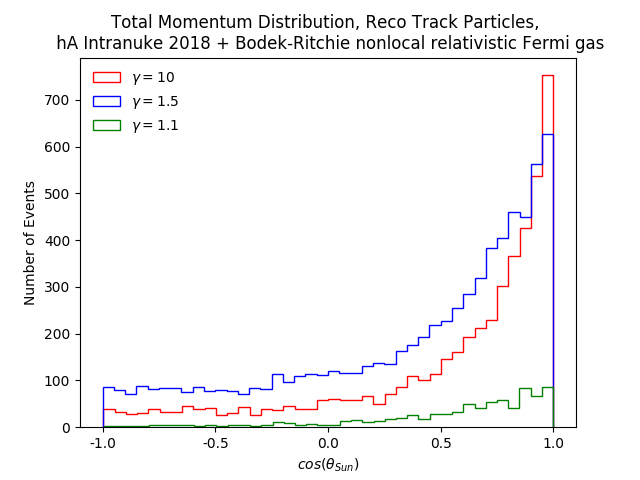

In [42]:
plt.figure(dpi=100)
plt.hist(CosSunTotalMomentumReco[numEventRecob1p5:numEventRecob10], bins = 40, color = "red", histtype='step', lw=1,label='$\gamma = 10$')
plt.hist(CosSunTotalMomentumReco[numEventRecob1p1:numEventRecob1p5], bins = 40, color = "blue", histtype='step', lw=1,label='$\gamma = 1.5$')
plt.hist(CosSunTotalMomentumReco[0:numEventRecob1p1], bins = 40, color = "green", histtype='step', lw=1,label='$\gamma =1.1$')

plt.title('Total Momentum Distribution, Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper left', frameon=False)
plt.xlabel(r'$cos(\theta_{Sun})$') 
plt.ylabel('Number of Events') 
plt.savefig('CosSunRecoDistBDM.pdf')




/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


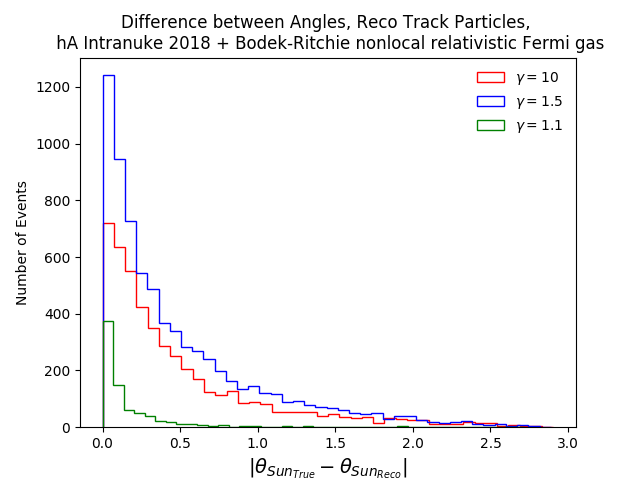

In [43]:
plt.figure(dpi=100)
plt.hist(RecoTrueAngleDiff[7977:12816], bins = 40,color = "red", histtype='step', lw=1,label='$\gamma = 10$')
plt.hist(RecoTrueAngleDiff[796:7976], bins = 40, color = "blue", histtype='step', lw=1,label='$\gamma = 1.5$')
plt.hist(RecoTrueAngleDiff[0:795], bins = 40, color = "green", histtype='step', lw=1,label='$\gamma =1.1$')
plt.title('Difference between Angles, Reco Track Particles, \n hA Intranuke 2018 + Bodek-Ritchie nonlocal relativistic Fermi gas')
plt.legend(loc='upper right', frameon=False)
plt.xlabel(r'$|\theta_{{Sun}_{True}} - \theta_{{Sun}_{Reco}}|$',fontsize = 14) 
plt.ylabel('Number of Events') 
plt.savefig('AngleDiffBDM.pdf')




In [44]:
Recob1p1 = CosSunTotalMomentumReco[0:numEventRecob1p1].astype(np.float)  
Recob1p5 = CosSunTotalMomentumReco[numEventRecob1p1:numEventRecob1p5].astype(np.float) 
Recob10 = CosSunTotalMomentumReco[numEventRecob1p5:numEventRecob10].astype(np.float)
                                                 

In [45]:
BackGround = CosSunTotalMomentumRecoBG.astype(np.float)

#To have a cool Sensitivity plot 
mpl.rcParams['text.usetex'] = True

# backgroundScale = number of NC events for 10 kt .y (From Josh Barrow thesis) at ...
#... truth level x 4 times fiducial volume x 10 years x Reconstructed and True Information Ratio 
#... divided by the total number of NC events analyzed

backgroundScale = 909* 4 * 10 *  0.31/11853


def optimizeSelection( Reco, gamma, BG):

    nSignalTotal = 10000 #Total number of events analyzed for each gamma sample
    nBGTotal = 0
    SprimeMin = 0
    bestCut = 0
    bestEff = 0
    bestBkg = 0
    bestBkgErr = 0

    CosCuts = np.linspace(0,0.95,30)
   
    nBGTotal = len(BG)

    rReco = 0
    bEvents = 0
    SprimeMin = 10000000.
    for CosCut in CosCuts:
        nReco = 0
        nBG = 0
        for Cos in Reco:
            if CosCut < Cos:
                nReco+=1
        for Cos in BG:
            if CosCut < Cos:
                nBG+=1
        rReco = nReco/nSignalTotal  
        bEvents = nBG*backgroundScale

        Sprime = 25./ (2.*rReco) + math.sqrt( 25.*bEvents/ (rReco*rReco) + 625./(4.*rReco*rReco) )
   
        if Sprime < SprimeMin:
            SprimeMin = Sprime
            bestCut = CosCut
            bestEff = rReco
            bestBkg = bEvents
            bestBkgErr = math.sqrt( nBG )*backgroundScale
            
            #print (bestCut, bestEff, bestBkg, bestBkgErr)
    return bestCut, bestEff, bestBkg, bestBkgErr

eff = []
Bkg = []
BCut = []
BkgErr = []
gamma=1.1
bestCut, bestEff, bestBkg, bestBkgErr = optimizeSelection(Recob1p1, gamma, BackGround)
print( 'gamma %d: optimal cut at %f, signal efficieny = %f, background counts = %f, background uncertainty =  %f\n' %( gamma, bestCut, bestEff, bestBkg, bestBkgErr ) )
eff.append(bestEff)
Bkg.append(bestBkg)
BCut.append(bestCut)
BkgErr.append(bestBkgErr)
gamma=1.5
bestCut, bestEff, bestBkg, bestBkgErr= optimizeSelection(Recob1p5, gamma, BackGround)
print( 'gamma %d: optimal cut at %f, signal efficieny = %f, background counts = %f, background uncertainty =  %f\n' %( gamma, bestCut, bestEff, bestBkg, bestBkgErr ) )
eff.append(bestEff)
Bkg.append(bestBkg)
BCut.append(bestCut)
BkgErr.append(bestBkgErr)
gamma=10
bestCut, bestEff, bestBkg, bestBkgErr = optimizeSelection(Recob10, gamma, BackGround)
print( 'gamma %d: optimal cut at %f, signal efficieny = %f, background counts = %f, background uncertainty =  %f\n' %( gamma, bestCut, bestEff, bestBkg, bestBkgErr ) )
eff.append(bestEff)
Bkg.append(bestBkg)
BCut.append(bestCut)
BkgErr.append(bestBkgErr)

gamma 1: optimal cut at 0.458621, signal efficieny = 0.056600, background counts = 936.684890, background uncertainty =  29.845262

gamma 1: optimal cut at 0.327586, signal efficieny = 0.463100, background counts = 1173.471222, background uncertainty =  33.405261

gamma 10: optimal cut at 0.556897, signal efficieny = 0.316800, background counts = 755.053607, background uncertainty =  26.795850



In [46]:

########################################################################################
# Calculate the sensitivity/expected sensitivity
########################################################################################

# Number of target Argon nuclei and livetime of DUNE
NA_dune = 4 * 1.5e32             # 40 kton
livetime_dune = 10.0 * 3.154e7   # 10 years

sigma2 = 2**2 # 2 sigma -> 95% C.L.

# 1st column is g_Z', should always be 1 in evt. generation
# lighter DM mass
MB = 5
# gamma
gam = np.array([1.1, 1.5, 10])
# Heavy DM mass = Lighter DM mass * gamma
MA = gam * MB
#Flux and BDM-Ar are obtained from the phemenological paper, https://arxiv.org/pdf/1912.05558.pdf
#  flux
flux = np.array([634.1, 468.3, 28.12])
#  argon cross section
sigAr = np.array([9.057 * 1e-30, 4.987 * 1e-29, 1.270 * 1e-27])

###############################################################
#     RECONSTRUCTED --- EFFICIENCY AND BACKGROUND EVENTS      #
###############################################################


#  DUNE efficiency - Reconstructed
effDUNE = eff
# expected bkg events after cuts at DUNE - Reconstructed
bkgDUNE = Bkg

evtsDUNE = NA_dune * livetime_dune * flux * sigAr * effDUNE



# Approximate 2 sigma sensitivity
# The square of the significance of an excess neglecting systematics, at large statistics
# minus the squared signfiicance we want: want to find this to be 0
evtsLimDUNE = []

def sigmasq(s):
        return 2.0 * ((s + bkgDUNE[i]) * np.log(1.0 + s / bkgDUNE[i]) - s) - sigma2
for i in range(len(gam)):
    #print(i)
    
    evtsLimDUNE.append(brentq(sigmasq, np.sqrt(bkgDUNE[i])/10.0, np.sqrt(bkgDUNE[i] * 10.0)))
    #evtsLimDUNE_paper.append(brentq(sigmasq, np.sqrt(bkgDUNE_paper[i]), np.sqrt(bkgDUNE_paper[i] * 10.0)))

DLv = np.sqrt(evtsLimDUNE / evtsDUNE)
print(evtsDUNE)

###############################################################
###############################################################






[6.15136492e+13 2.04668613e+15 2.14100238e+15]


[5.34386242e+14 2.88683952e+15 5.15989683e+15]


/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


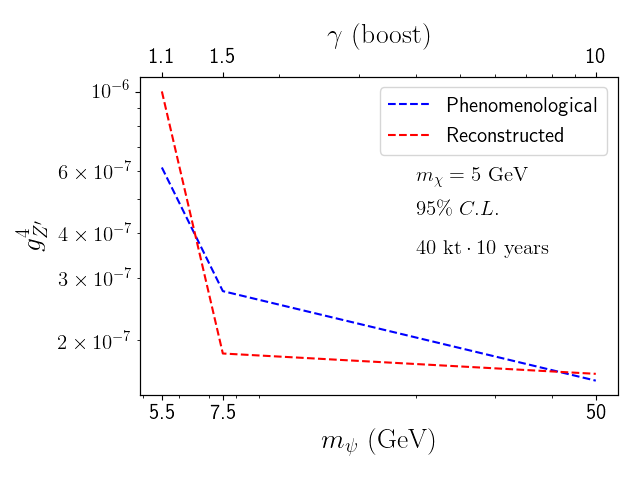

In [52]:
###############################################################
#     PAPER --- EFFICIENCY AND BACKGROUND EVENTS              #
###############################################################

# Nbr. of expected events in nu experiments at g_Z' = 1:
# Number of target nuclei * livetime * flux * cross-section on Argon * efficiency

#  DUNE efficiency
effDUNE_paper = np.array([0.4917, 0.6532, 0.7635])
 # expected bkg events after cuts at DUNE
bkgDUNE_paper = np.array([10006, 11894, 3723])

evtsDUNE_paper = NA_dune * livetime_dune * flux * sigAr * effDUNE_paper

###############################################################
###############################################################


# Redefining variables for the Paper. Data from Table III, https://arxiv.org/pdf/1912.05558.pdf

evtsLimDUNE = []
for i in range(len(gam)):
    def sigmasq(s):
        return 2.0 * ((s + bkgDUNE_paper[i]) * np.log(1.0 + s / bkgDUNE_paper[i]) - s) - sigma2
        # Solve for the number of signal events required for sensitivity
        # We need to give a search range: take sqrt(N_b)/10 to sqrt(N_b) * 10
        # For any "reasonable" number of background events this should be enough

    evtsLimDUNE.append(brentq(sigmasq, np.sqrt(
        bkgDUNE_paper[i])/10.0, np.sqrt(bkgDUNE_paper[i] * 10.0)))

PaperDLv = np.sqrt(evtsLimDUNE / evtsDUNE_paper)

print(evtsDUNE_paper)

################################################################
#                         PLOT FIGURE                          #
################################################################

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

#ax1.rc('text', usetex=True)
plt.rc('font', size=15)

ax1.plot(MA, PaperDLv, '--',
        label='Phenomenological', color='blue')
ax1.plot(MA, DLv, '--',label='Reconstructed', color='red')
ax2.plot(gam, DLv) 
ax2.cla()


ax1.text(20,0.55e-06,r'$m_\chi=5~\textrm{GeV}$')
ax1.text(20,0.45e-06,r'$95\%\;C.L.$')
ax1.text(20,0.35e-06,r'$40~\textrm{kt}\cdot 10~\textrm{years}$')
#plt.text(50,1.2e-06,r'$95%\;C.L.$')

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xticks([5.5e0,7.5e0,5e1])
ax1.set_xticklabels(['5.5','7.5','50'])
#ax1.set_axis(xlim=[1e0,1.5e2],ylim=[1e-9,1e-4])
ax1.set_xlabel(r'$m_\psi~(\textrm{GeV})$', fontsize=20)
ax1.set_ylabel(r'$g_{Z^\prime}^4$',fontsize=20)
minx,maxx = ax1.get_xlim()
ax2.set_xlim(minx/MB,maxx/MB)
ax2.set_xscale('log')
ax2.set_xticks([1.1e0,1.5e0,1e1])
ax2.set_xticklabels(['1.1','1.5','10'])
ax2.set_xlabel(r'$\gamma~(\textrm{boost})$', fontsize = 20)

ax1.legend()
plt.tight_layout()
plt.show()

############################################################
############################################################


/home/leoperes/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


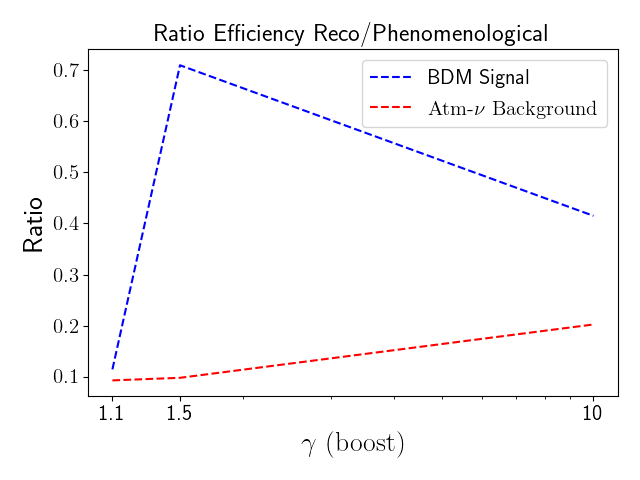

In [55]:
################################################################
#       COMPARE EFFICIENCY - PAPER AND RECO                    #
################################################################

plt.figure()
plt.title('Ratio Efficiency Reco/Phenomenological')
plt.plot(gam,effDUNE/effDUNE_paper,'--', color = 'blue', label ='BDM Signal')
plt.plot(gam,bkgDUNE/bkgDUNE_paper,'--', color='red', label = r'$~\textrm{Atm-}\nu~\textrm{Background}$')
plt.xscale('log')
plt.ylabel('Ratio', fontsize = 20)
plt.xticks([1.1e0,1.5e0,1e1],['1.1','1.5','10'])
plt.xlabel(r'$\gamma~(\textrm{boost})$', fontsize = 20)
plt.legend()
plt.tight_layout()


################################################################
################################################################